In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import ensemble
from sklearn import model_selection
from sklearn import multiclass
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 7.5, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [2]:
# 数据加载
train = pd.read_csv(r'..\新建文件夹\train (1).csv')
train

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,22496,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22496,22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22497,22498,25,admin.,married,professional.course,no,yes,no,cellular,may,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no
22498,22499,57,retired,married,high.school,no,yes,no,telephone,may,...,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43,no


In [3]:
test = pd.read_csv(r'..\新建文件夹\test (1).csv')
test

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [4]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe'],
      dtype='object')

In [5]:
train=train.drop_duplicates()
test=test.drop_duplicates() 
print(train.shape)
print(test.shape) 

(22500, 22)
(7500, 21)


In [6]:
train.describe()

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,11250.500000,40.407511,1146.303733,3.364800,773.991956,1.316444,0.078529,93.548785,-39.877180,3.302490,5137.211285
std,6495.334864,12.086078,1432.432125,7.223837,326.934334,1.918733,1.573831,2.805786,5.805442,1.611777,170.670611
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.640000,-53.280000,0.600000,4715.420000
25%,5625.750000,32.000000,143.000000,1.000000,557.750000,0.000000,-1.800000,91.190000,-44.160000,1.430000,5008.510000
50%,11250.500000,38.000000,353.000000,1.000000,964.000000,0.000000,1.100000,93.540000,-40.600000,3.920000,5133.955000
75%,16875.250000,47.000000,1873.000000,3.000000,1005.000000,2.000000,1.400000,95.920000,-35.797500,4.830000,5267.677500
max,22500.000000,101.000000,5149.000000,57.000000,1048.000000,6.000000,1.400000,99.460000,-25.550000,5.270000,5489.500000


In [7]:
train.isnull().sum() #检查是否有缺失值

id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
subscribe           0
dtype: int64

In [8]:
train['subscribe'].replace(['no'],0,inplace=True)
train['subscribe'].replace(['yes'],1,inplace=True)

In [9]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,0
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,1
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,0
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,1
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,0


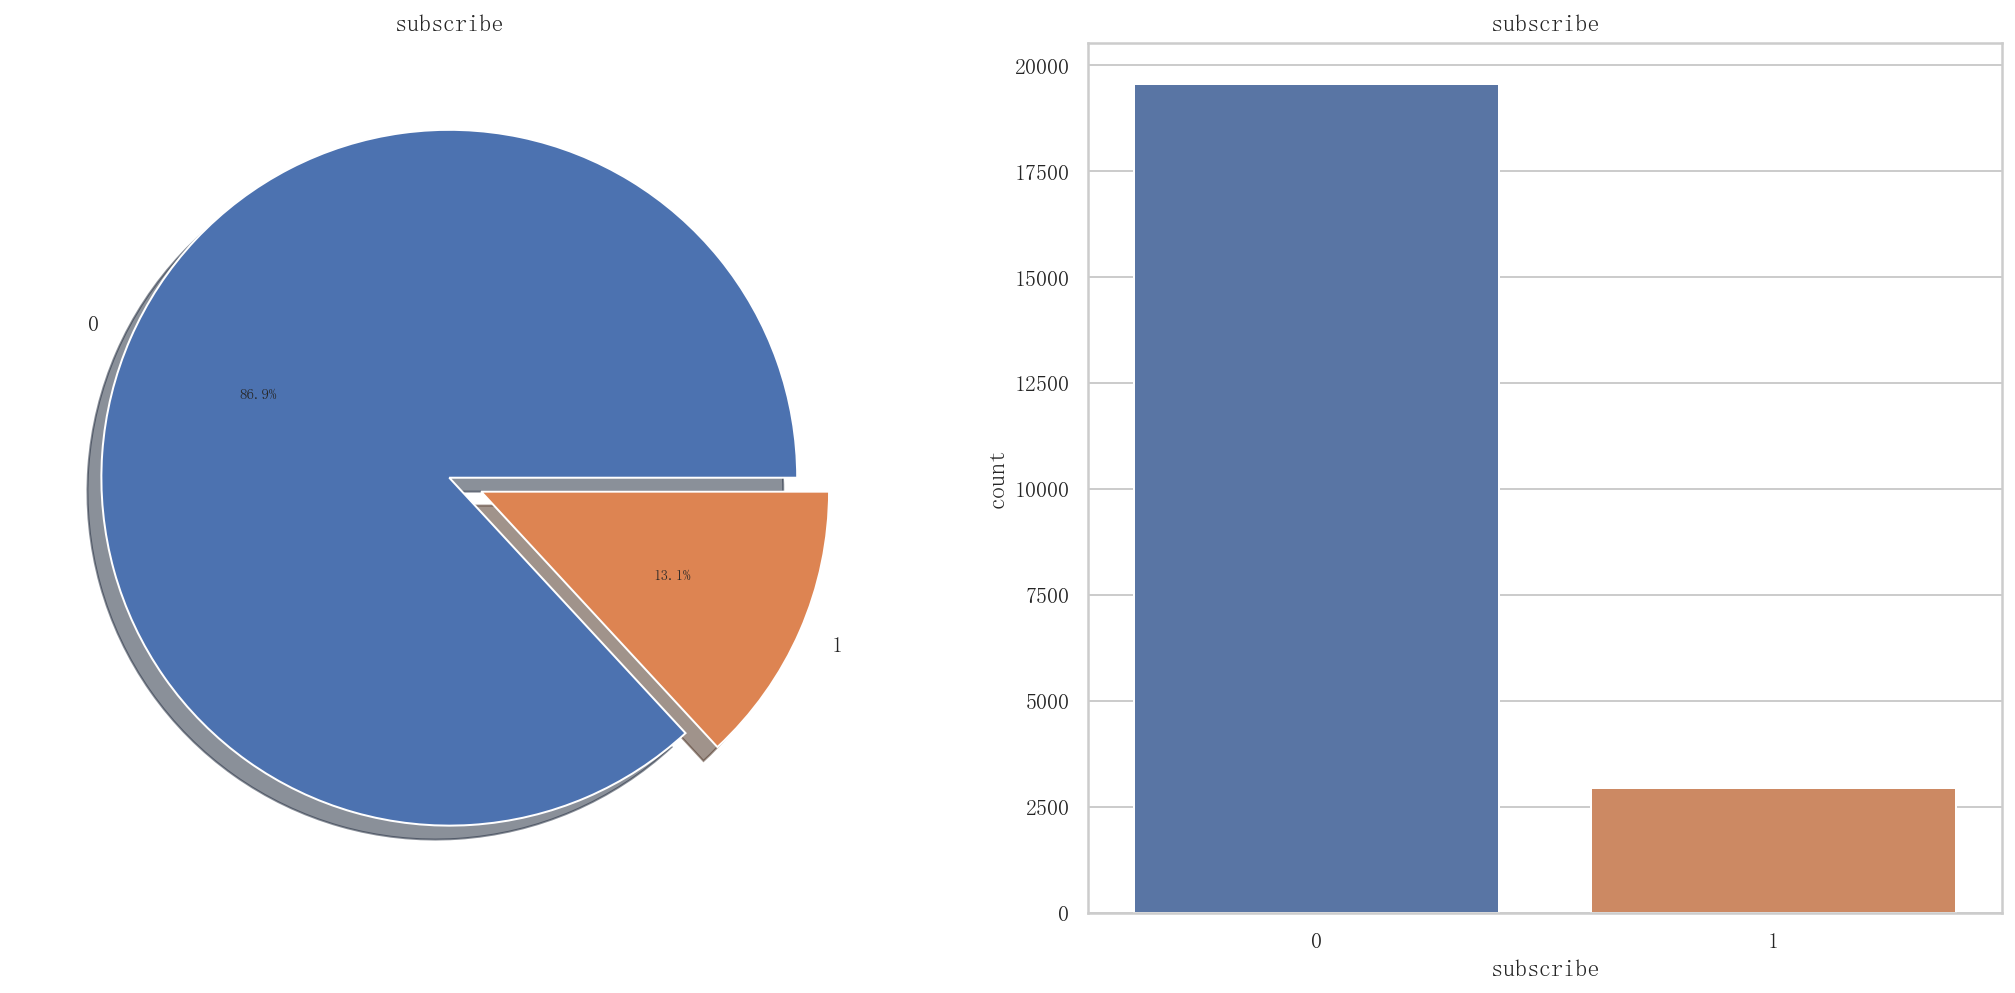

In [10]:
data=train
f,ax=plt.subplots(1,2,figsize=(18,8))
data['subscribe'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('subscribe')
ax[0].set_ylabel('')
sns.countplot('subscribe',data=data,ax=ax[1])
ax[1].set_title('subscribe')
plt.show()

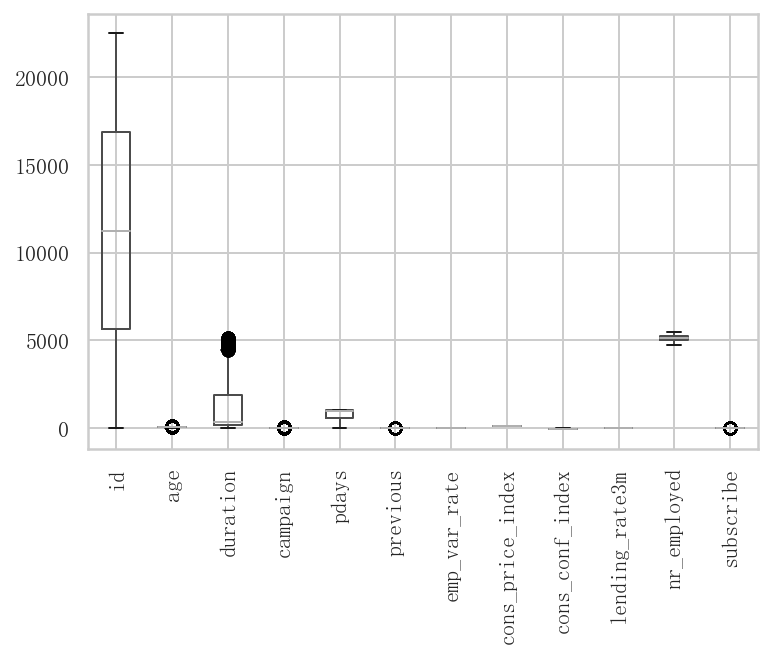

In [11]:
train.boxplot()
plt.xticks(rotation=90)
plt.show()

## 分析特征

## job

In [12]:
pd.crosstab(data.job,data.subscribe,margins=True).style.background_gradient(cmap='summer_r')

subscribe,0,1,All
job,,,
admin.,4827,730,5557
blue-collar,4506,368,4874
entrepreneur,757,106,863
housemaid,559,98,657
management,1383,217,1600
retired,734,272,1006
self-employed,699,137,836
services,1882,201,2083
student,384,189,573


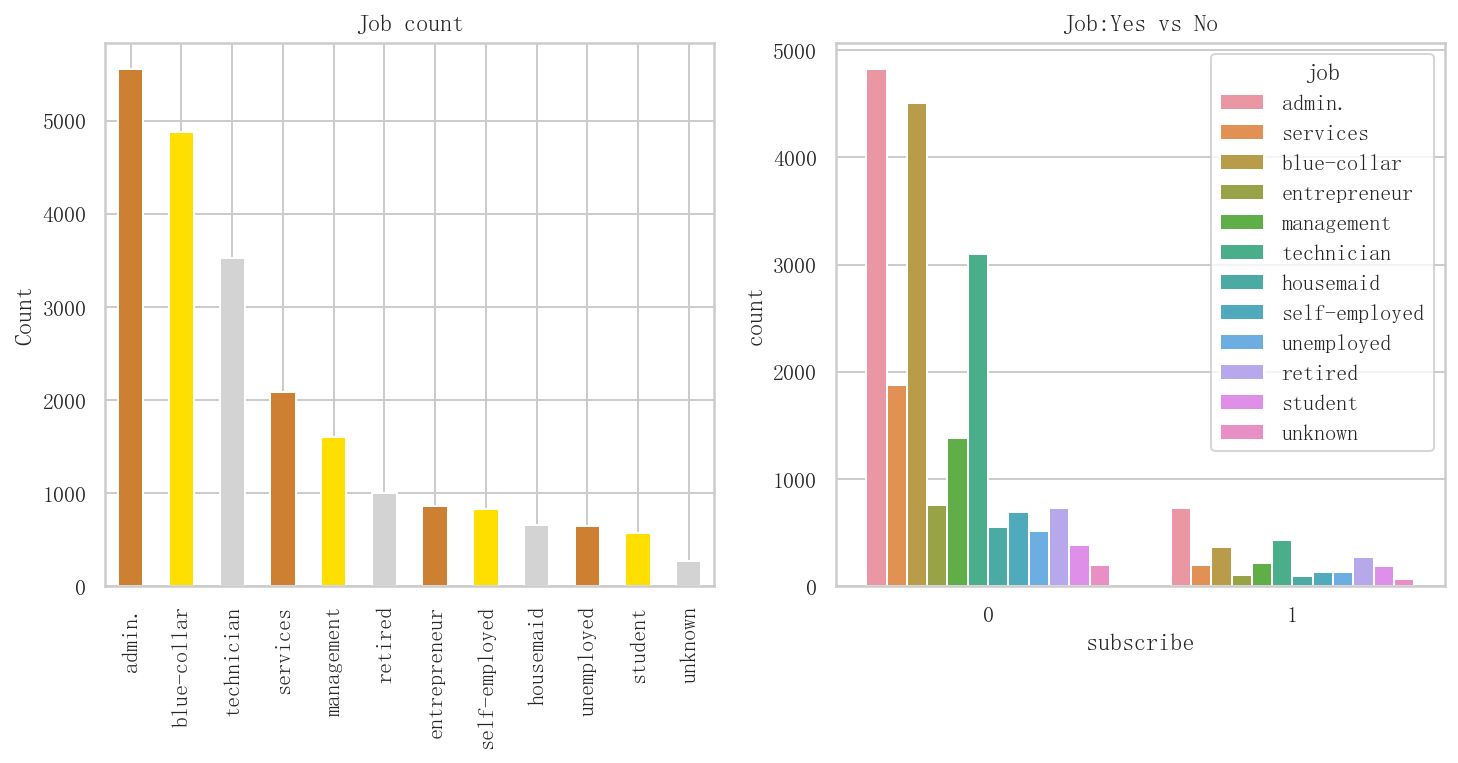

In [13]:
f,ax=plt.subplots(1,2,figsize=(12,5))
data['job'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Job count')
ax[0].set_ylabel('Count')
# sns.countplot('job',hue='subscribe',data=data,ax=ax[1])
sns.countplot('subscribe',hue='job',data=data,ax=ax[1])
ax[1].set_title('Job:Yes vs No')
plt.show()

## Marital

In [14]:
pd.crosstab(data.housing,data.subscribe,margins=True).style.background_gradient(cmap='summer_r')

subscribe,0,1,All
housing,,,
no,8793,1253,10046
unknown,661,225,886
yes,10094,1474,11568
All,19548,2952,22500


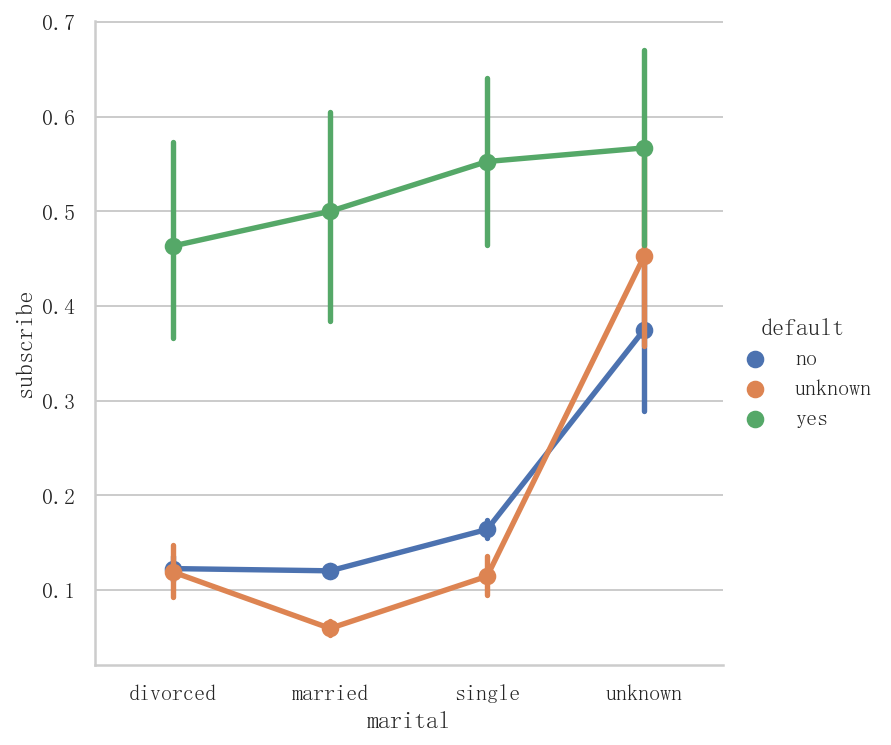

In [15]:
sns.factorplot('marital','subscribe',hue='default',data=data)
plt.show()

## Age

In [16]:
print('Oldest:',data['age'].max(),'Years')
print('Youngest:',data['age'].min(),'Years')
print('Average:',data['age'].mean(),'Years')

Oldest: 101 Years
Youngest: 16 Years
Average: 40.40751111111111 Years


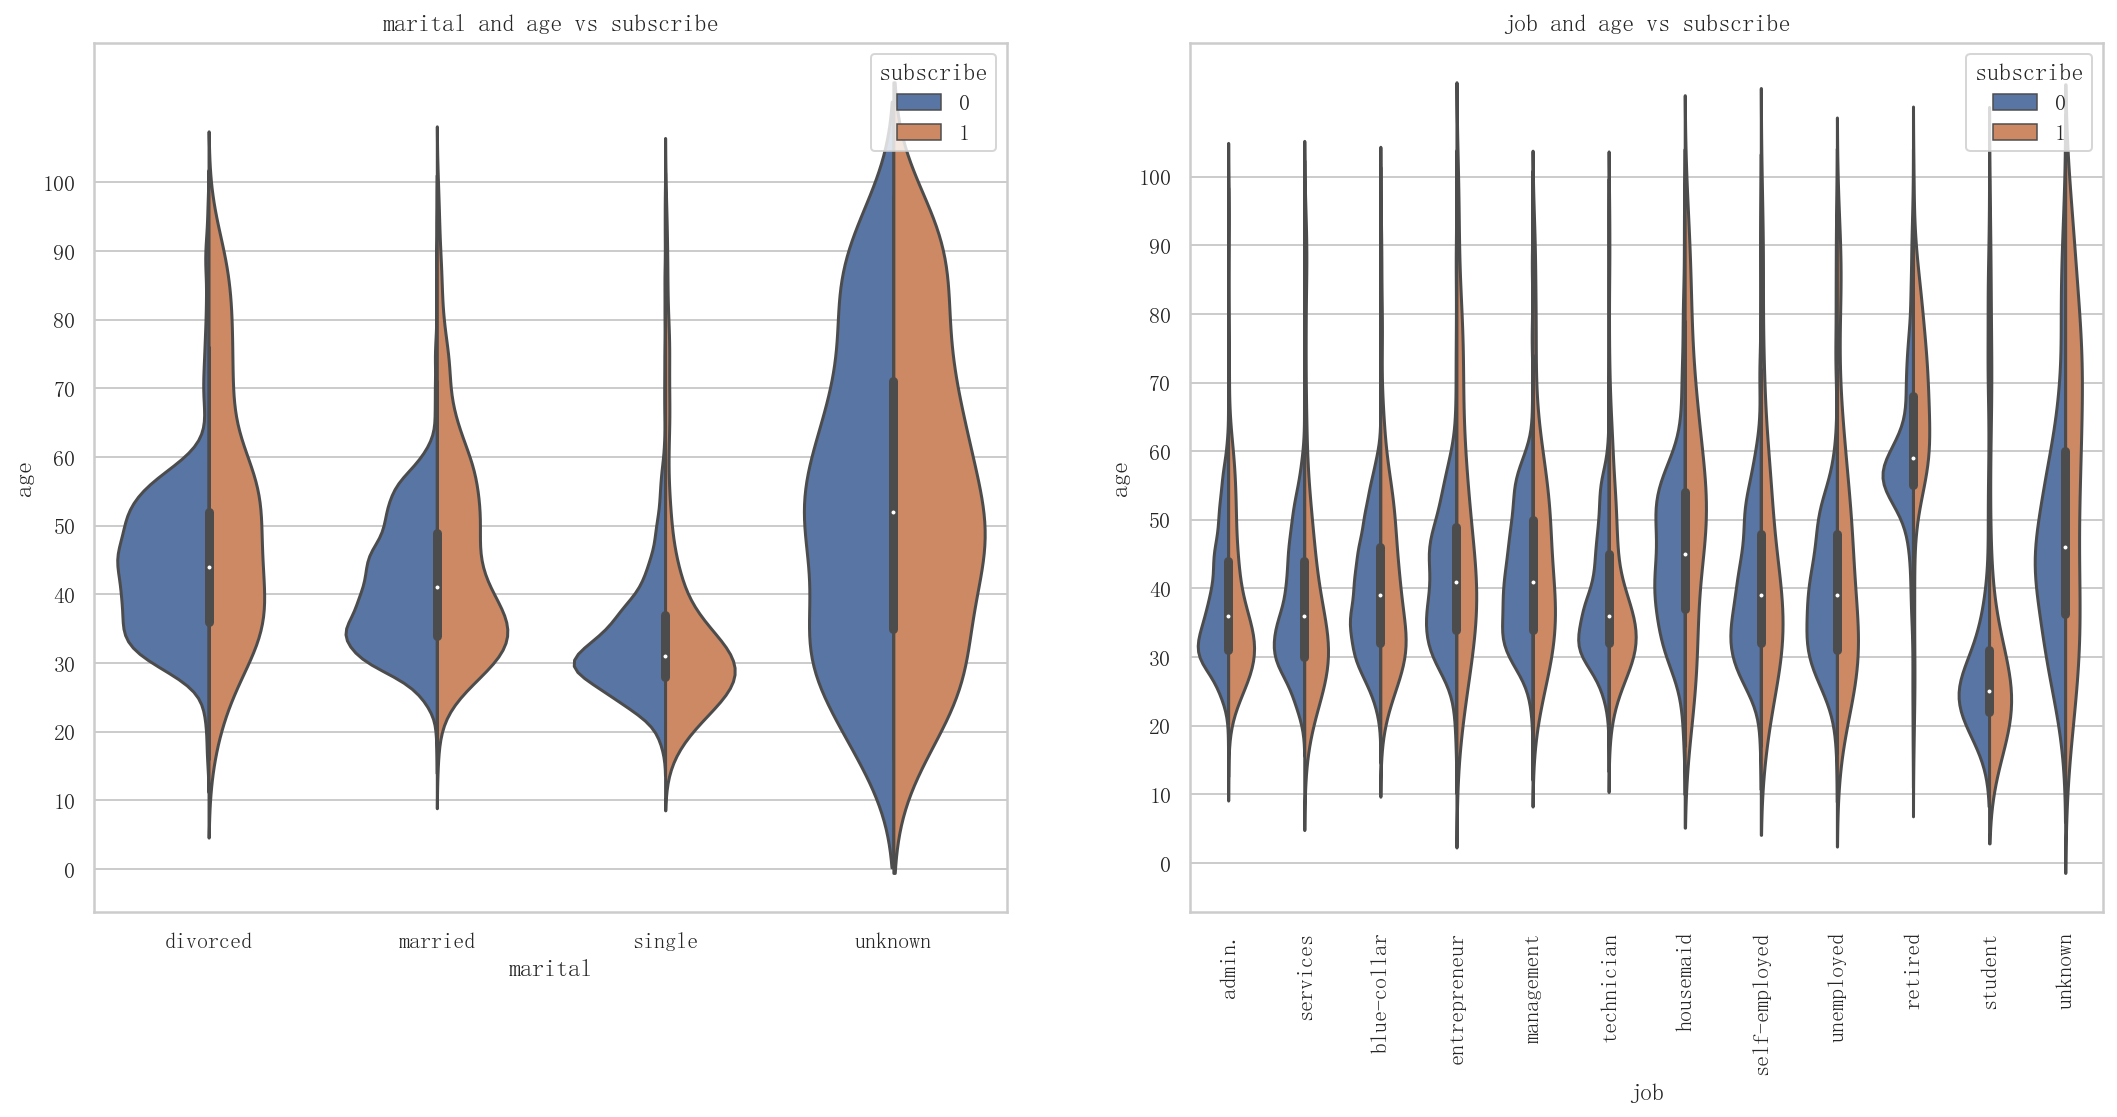

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("marital","age", hue="subscribe", data=data,split=True,ax=ax[0])
ax[0].set_title('marital and age vs subscribe')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("job","age", hue="subscribe", data=data,split=True,ax=ax[1])
ax[1].set_title('job and age vs subscribe')
ax[1].set_yticks(range(0,110,10))
plt.xticks(rotation=90)
plt.show()

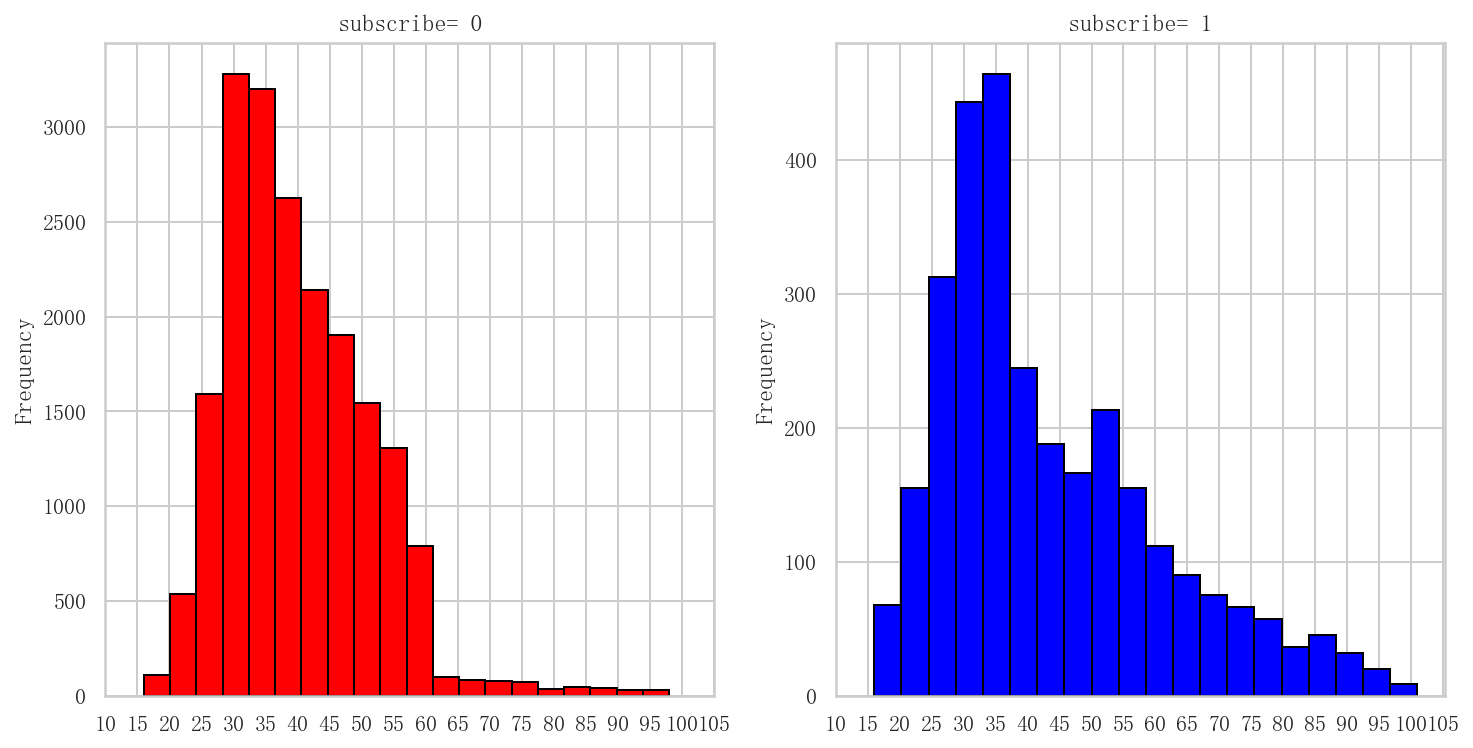

In [18]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data[data['subscribe']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('subscribe= 0')
x1=list(range(10,110,5))
ax[0].set_xticks(x1)
data[data['subscribe']==1].age.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='black')
ax[1].set_title('subscribe= 1')
x2=list(range(10,110,5))
ax[1].set_xticks(x2)
plt.show()

In [19]:
data.isnull().any()

id                  False
age                 False
job                 False
marital             False
education           False
default             False
housing             False
loan                False
contact             False
month               False
day_of_week         False
duration            False
campaign            False
pdays               False
previous            False
poutcome            False
emp_var_rate        False
cons_price_index    False
cons_conf_index     False
lending_rate3m      False
nr_employed         False
subscribe           False
dtype: bool

## housing

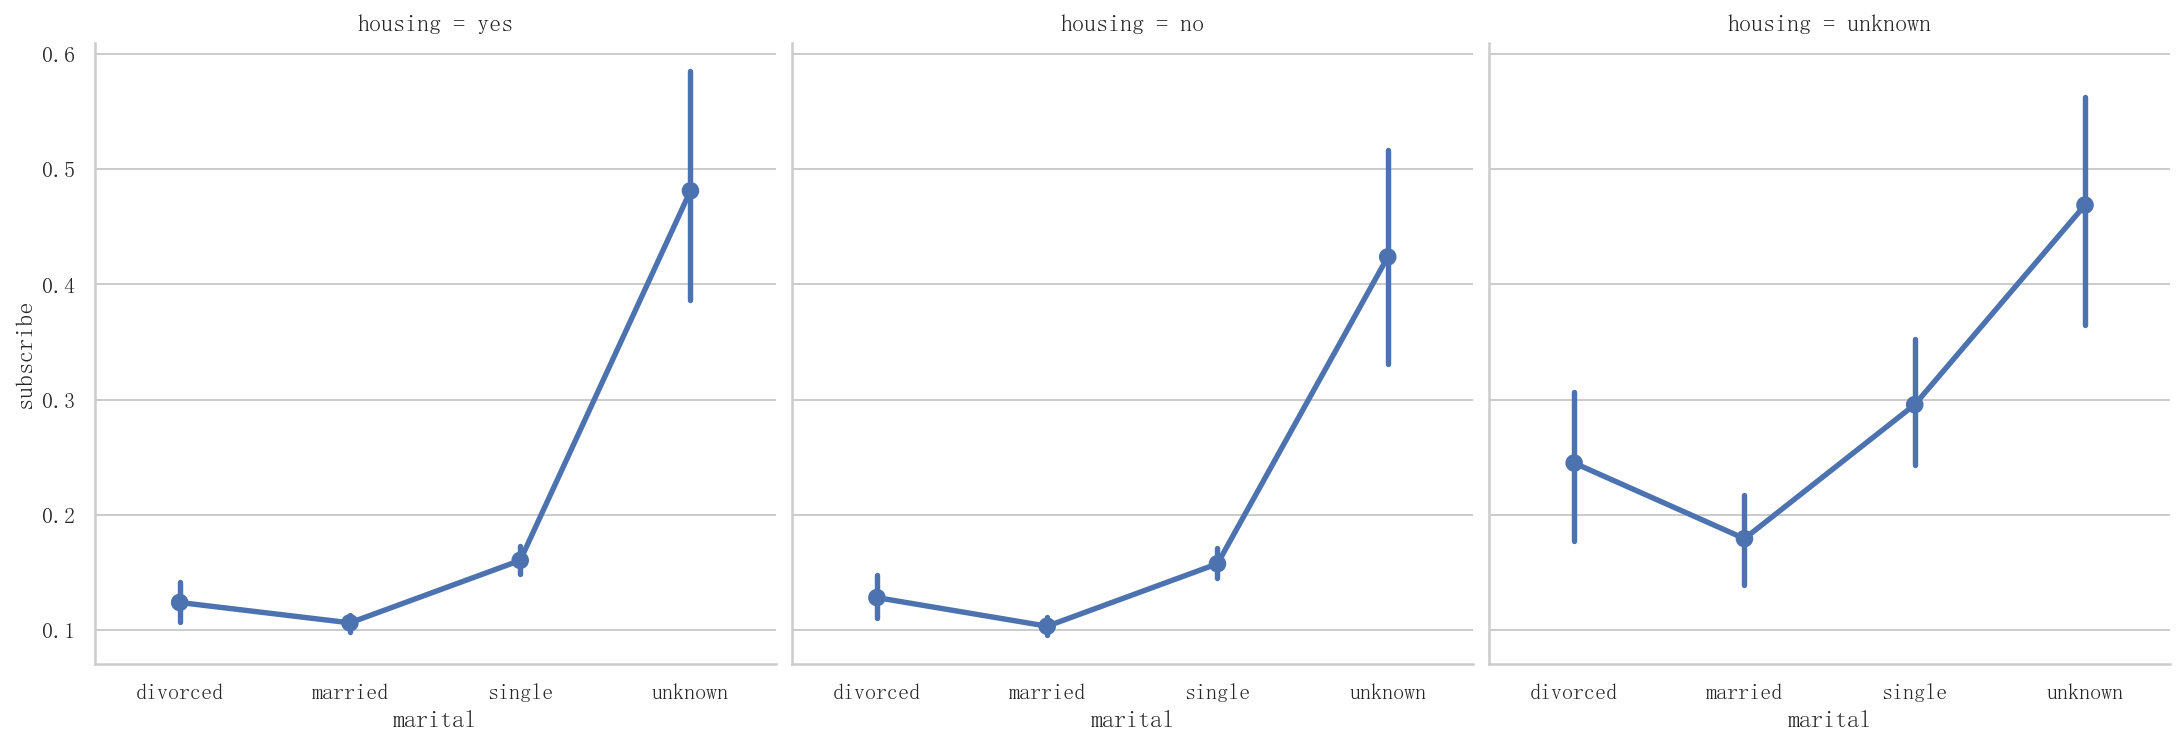

In [20]:
sns.factorplot('marital','subscribe',col='housing',data=data)
plt.show()

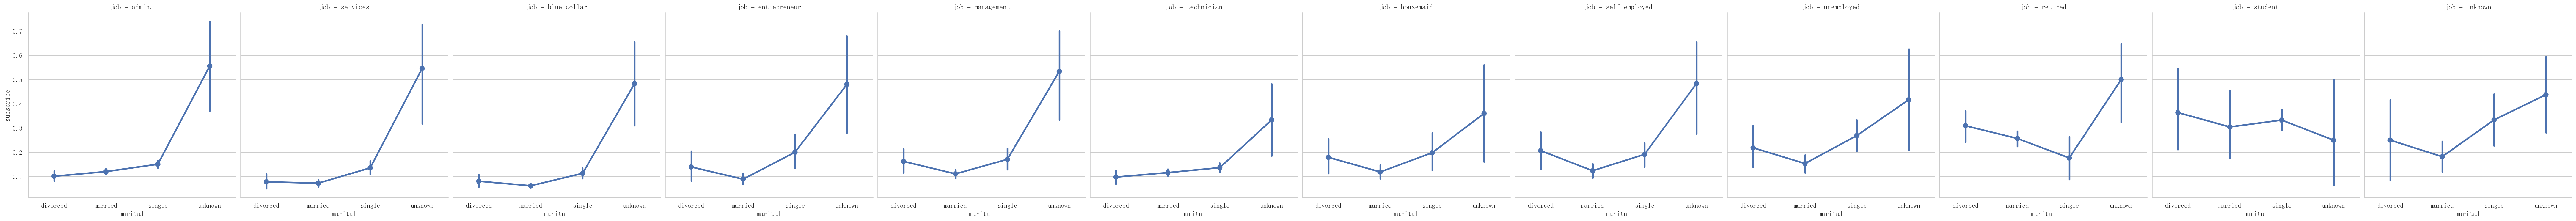

In [21]:
sns.factorplot('marital','subscribe',col='job',data=data)
plt.show()

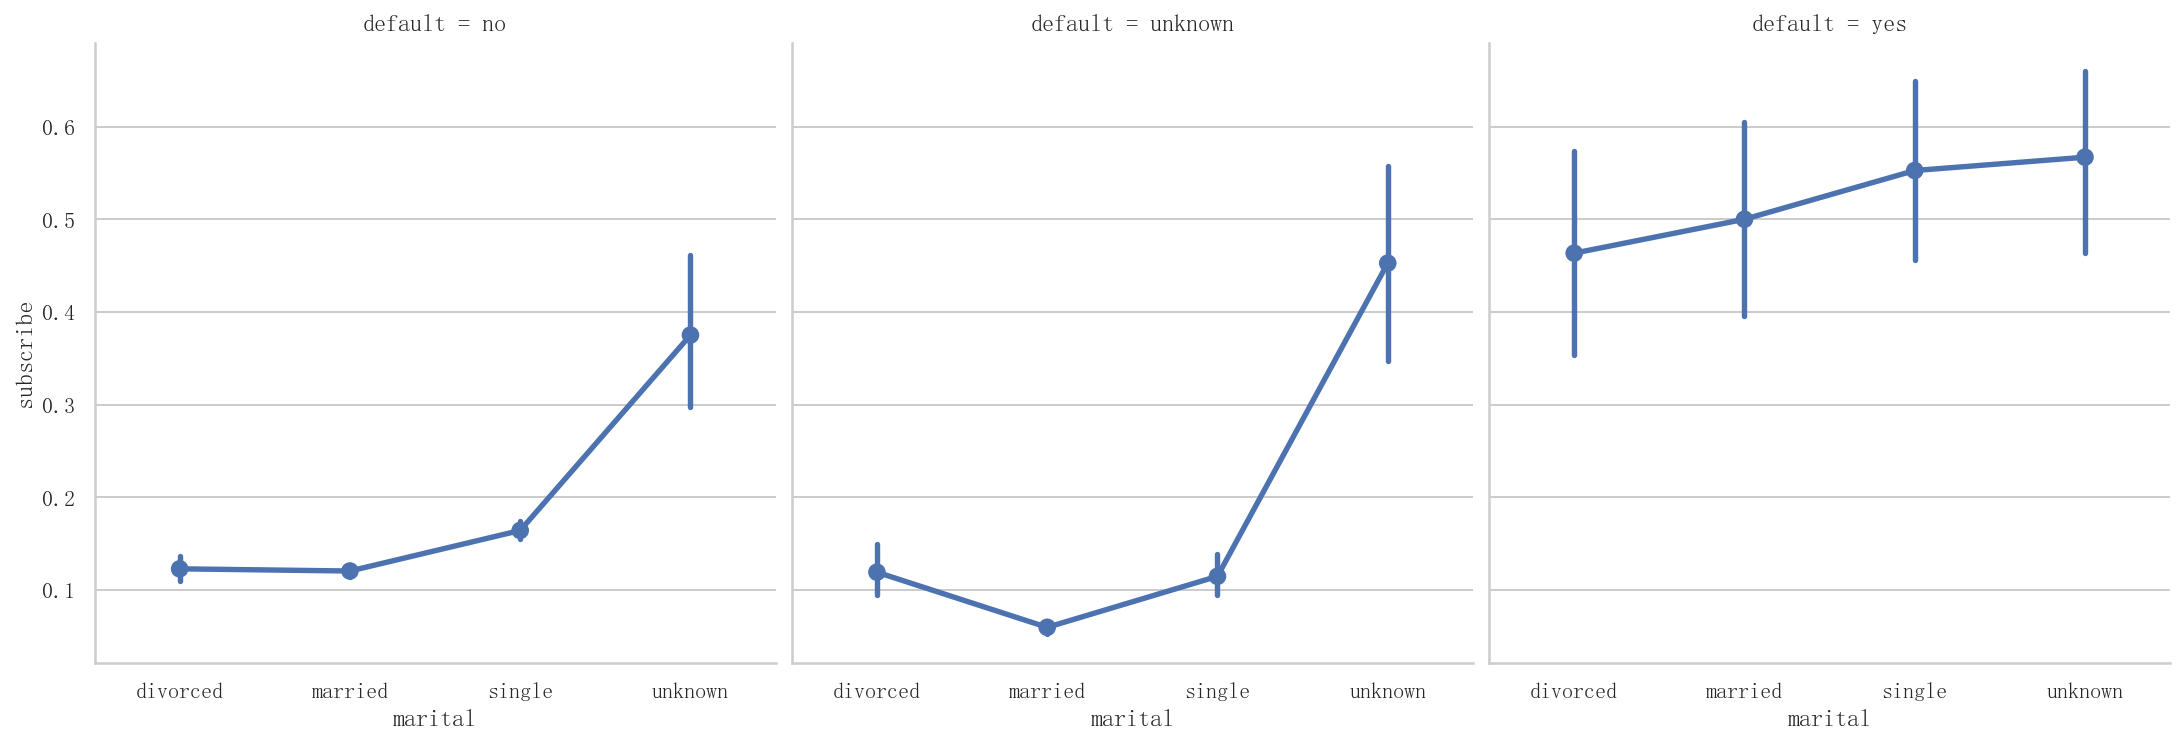

In [22]:
sns.factorplot('marital','subscribe',col='default',data=data)
plt.show()

In [24]:
pd.crosstab([data.education,data.housing],[data.marital,data.subscribe],margins=True).style.background_gradient(cmap='summer_r')

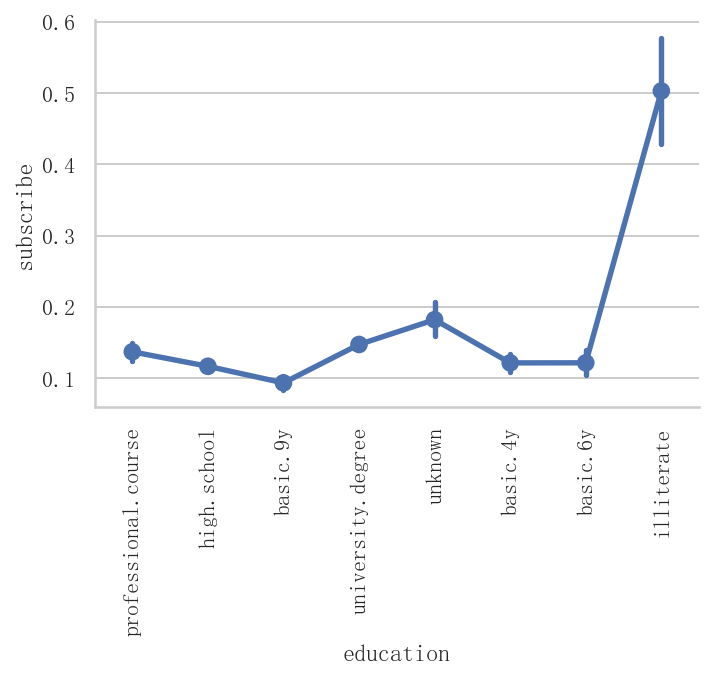

In [25]:
sns.factorplot('education','subscribe',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.xticks(rotation=90)
plt.show()

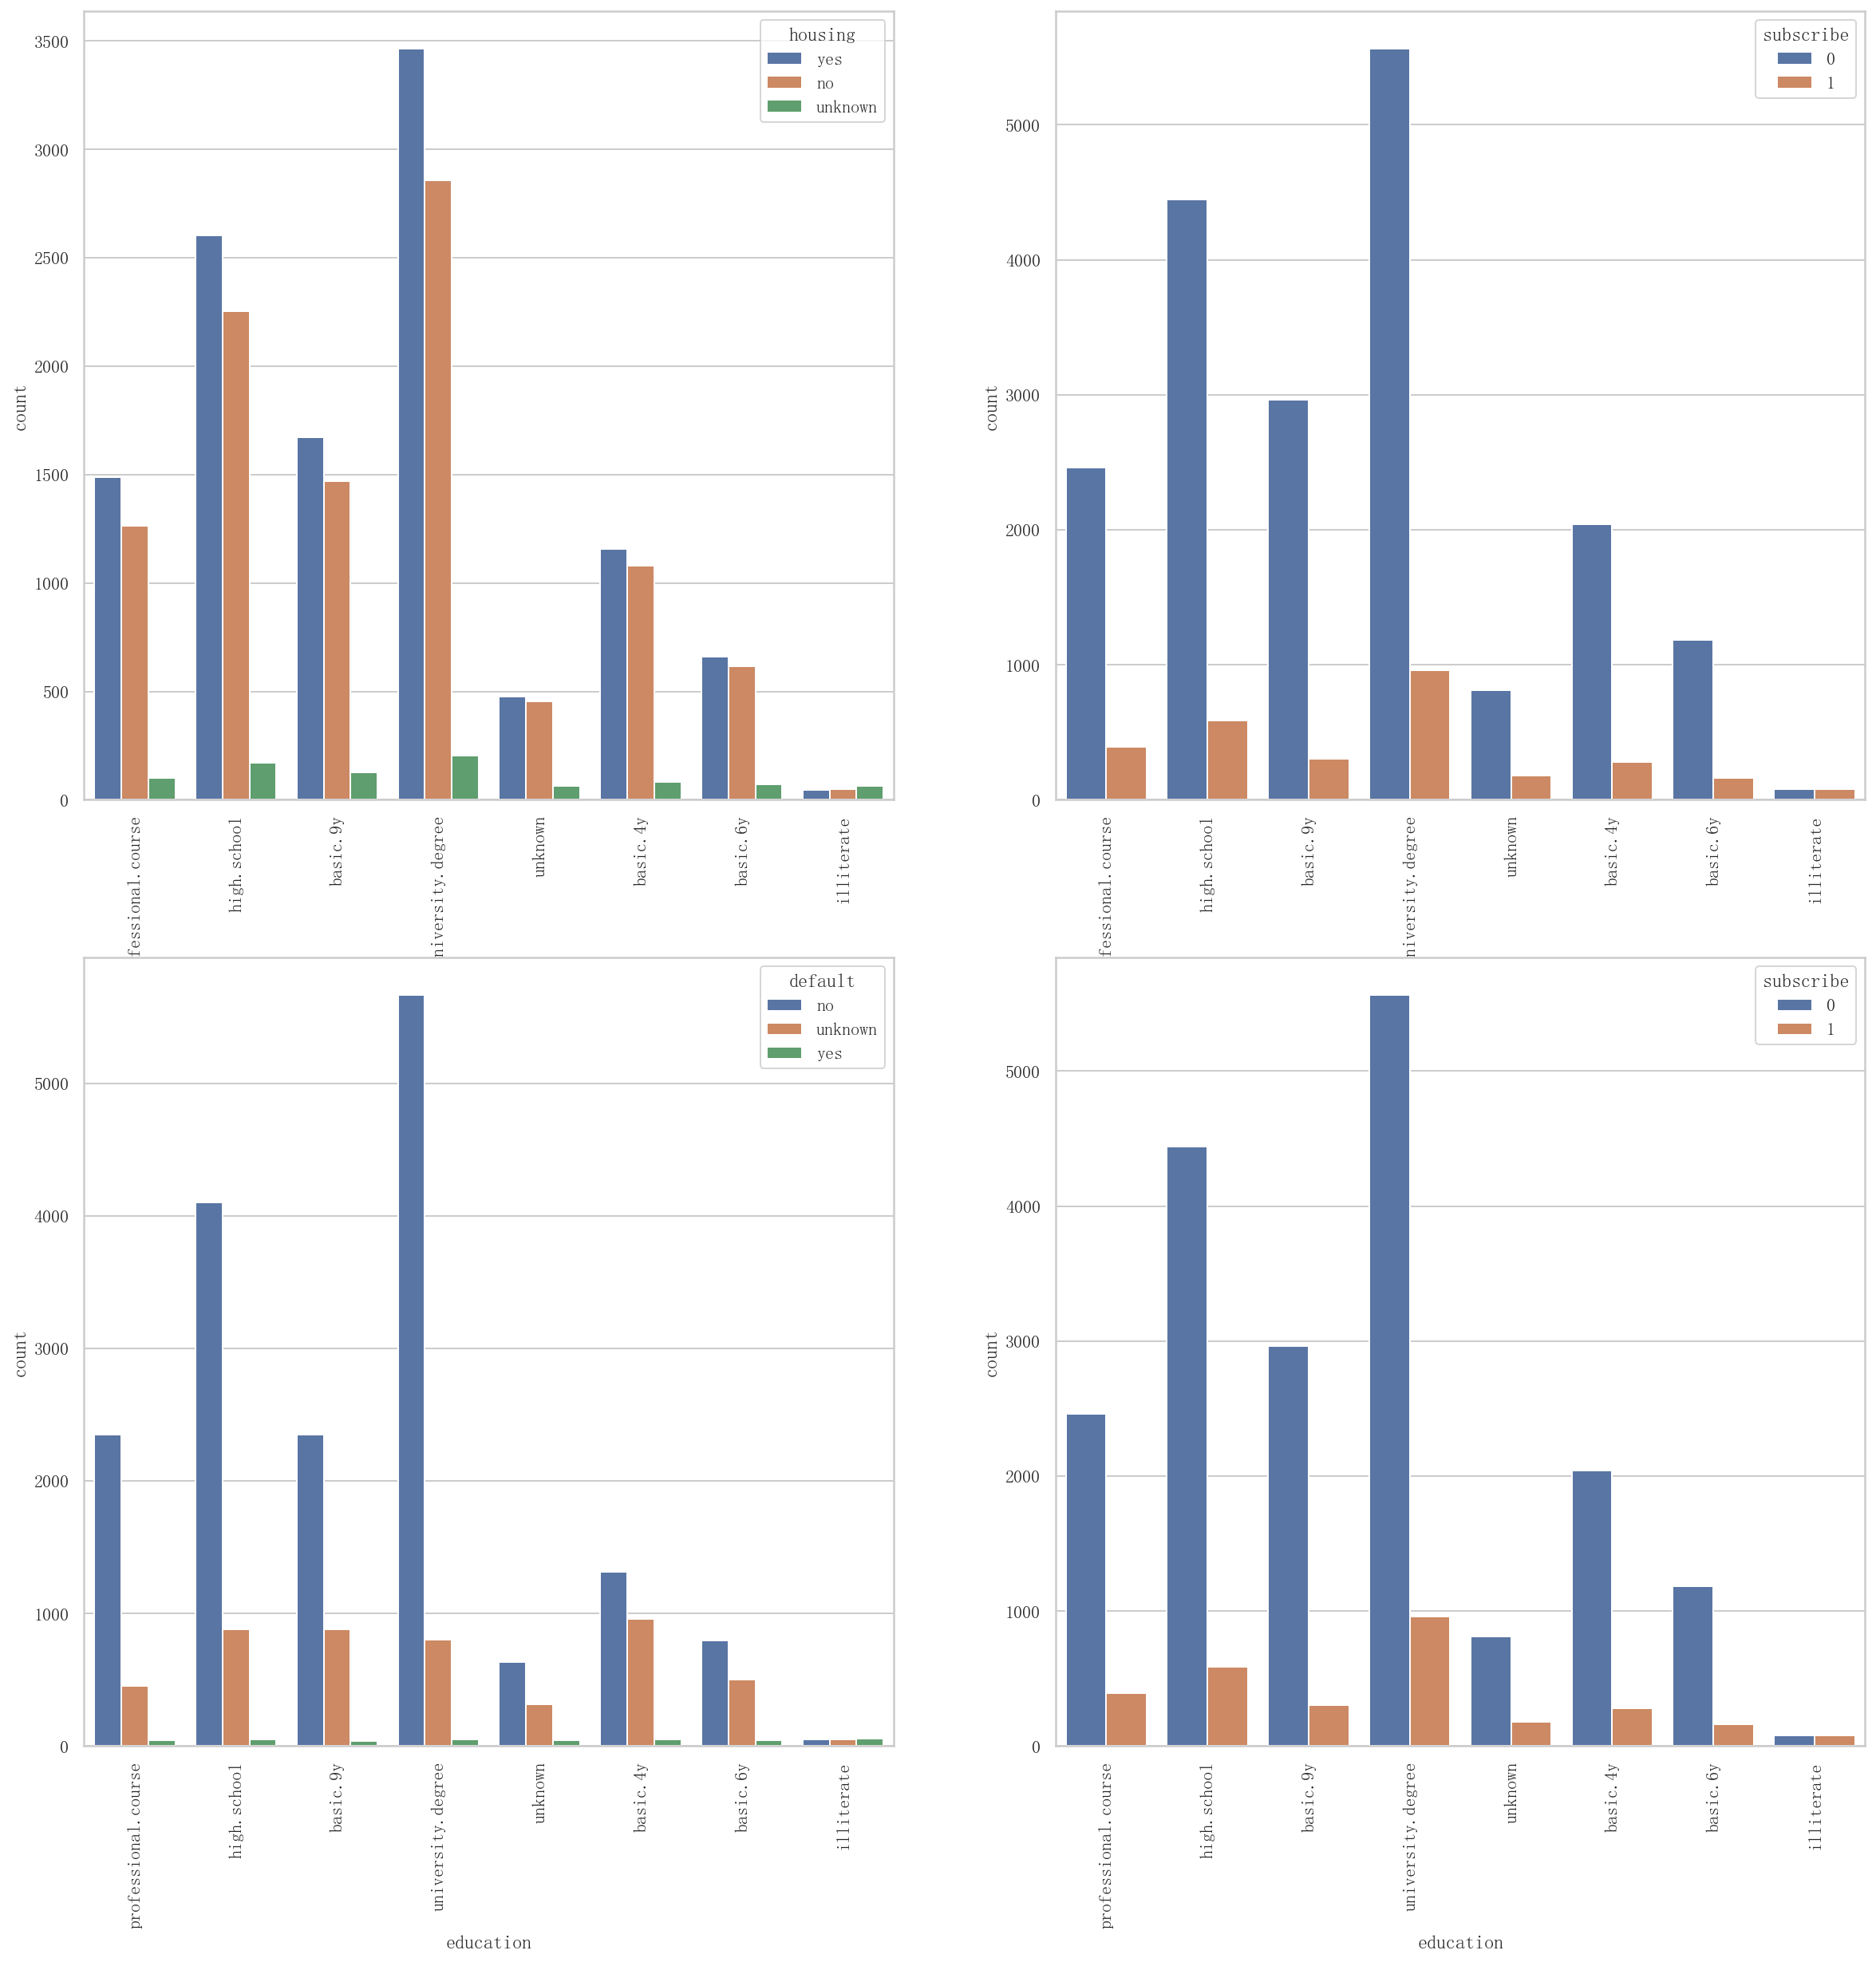

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot('education',hue='housing',data=data)
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot('education',hue='subscribe',data=data)
plt.xticks(rotation=90)
plt.subplot(223)
sns.countplot('education',hue='default',data=data)
plt.xticks(rotation=90)
plt.subplot(224)
sns.countplot('education',hue='subscribe',data=data)
plt.xticks(rotation=90)
plt.show()

## 连续型指标

In [27]:
print('Highest :',data['nr_employed'].max())
print('Lowest :',data['nr_employed'].min())
print('Average :',data['nr_employed'].mean())

Highest : 5489.5
Lowest : 4715.42
Average : 5137.211285333288


In [28]:
print('Highest :',data['lending_rate3m'].max())
print('Lowest :',data['lending_rate3m'].min())
print('Average :',data['lending_rate3m'].mean())

Highest : 5.27
Lowest : 0.6
Average : 3.3024902222222217


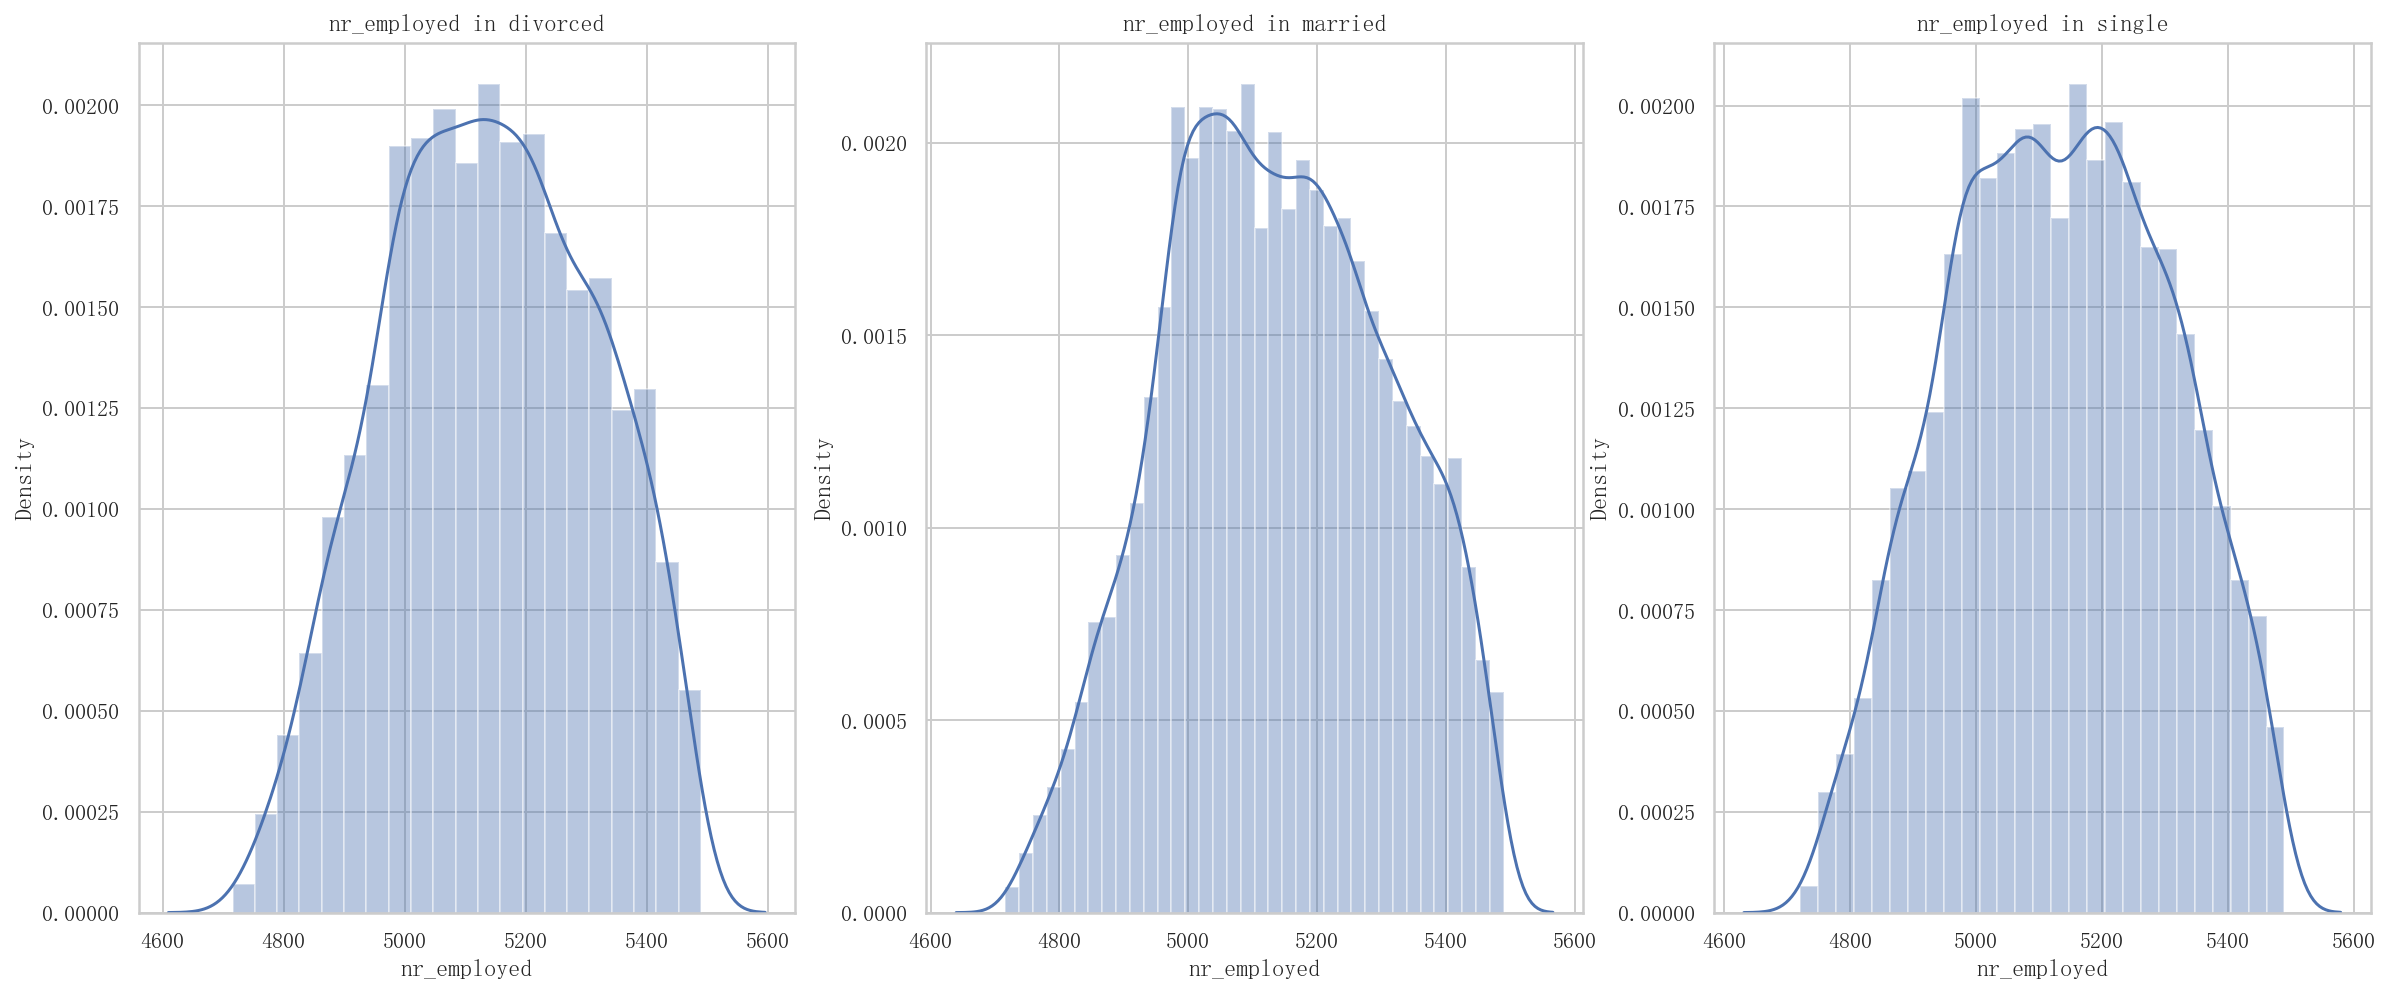

In [29]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['marital']=='divorced'].nr_employed,ax=ax[0])
ax[0].set_title('nr_employed in divorced')
sns.distplot(data[data['marital']=='married'].nr_employed,ax=ax[1])
ax[1].set_title('nr_employed in married')
sns.distplot(data[data['marital']=='single'].nr_employed,ax=ax[2])
ax[2].set_title('nr_employed in single')
plt.show()

In [30]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe'],
      dtype='object')

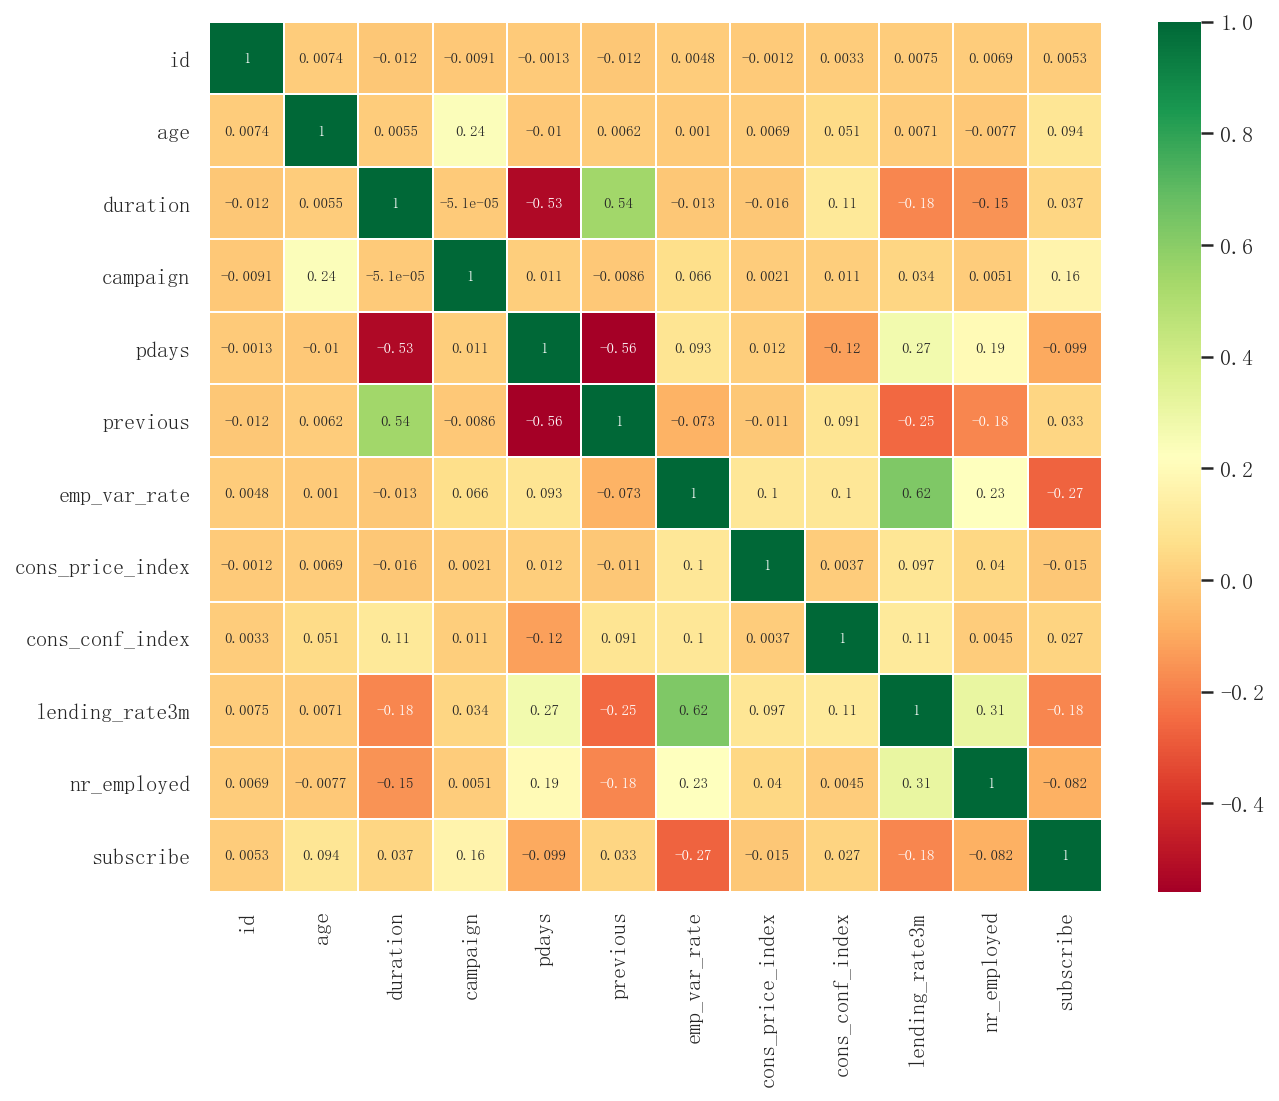

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 特征工程

In [32]:
#离散变量列名
object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','day_of_week']
#连续变量列名
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp_var_rate', 'cons_price_index','cons_conf_index','lending_rate3m', 'nr_employed']

In [35]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe'],
      dtype='object')

In [ ]:
X=data[['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed']]

In [ ]:
y=data[ 'subscribe']

In [43]:
X_trans=pd.get_dummies(X,columns=object_columns)

In [47]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [48]:
%%time
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_trans, y)

Wall time: 1h 5min 44s


In [50]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_trans.columns[rfecv.support_])

Optimal number of features : 26
Best features : Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed',
       'job_admin.', 'marital_married', 'education_university.degree',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'contact_cellular', 'month_mar', 'month_may', 'month_oct',
       'poutcome_nonexistent', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')


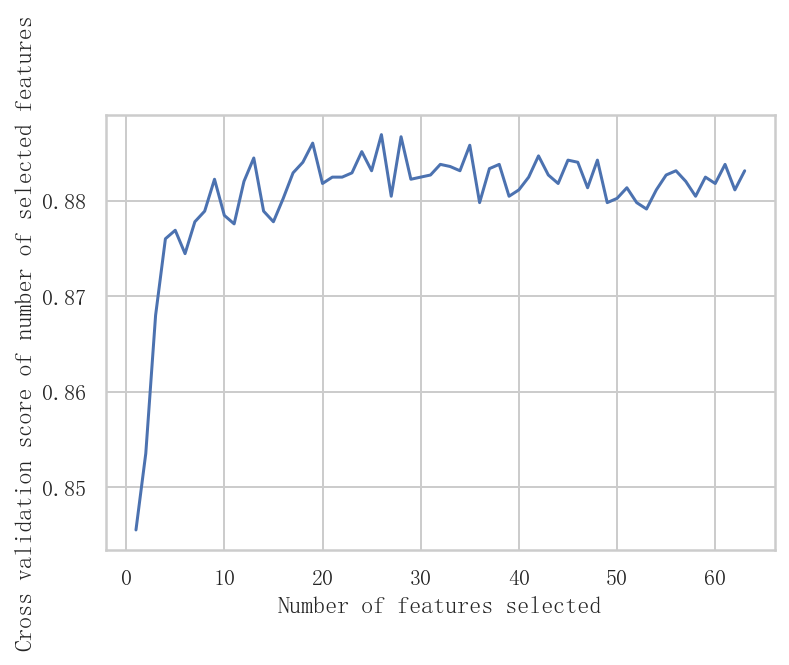

In [65]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_.T[0])
plt.show()

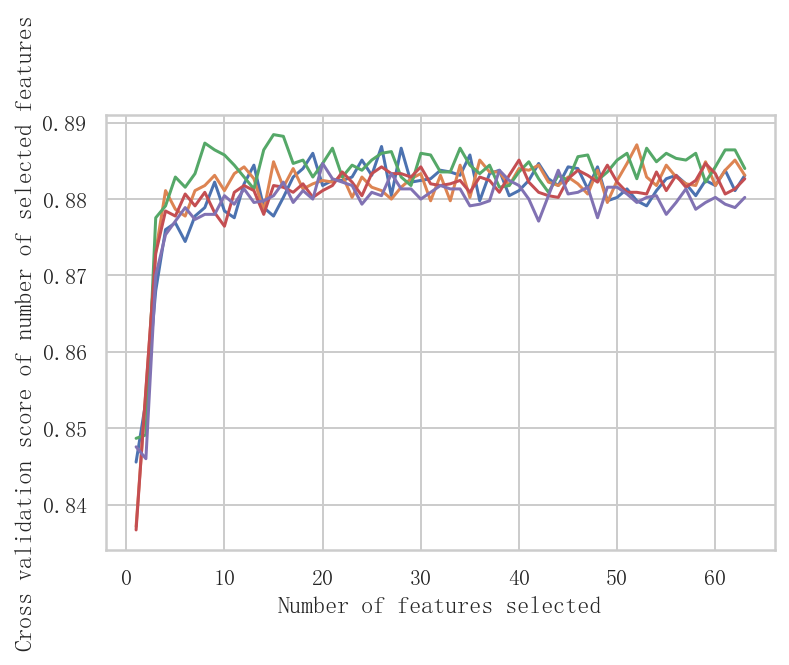

In [67]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [69]:
X_trans

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,51,4621,1,112,2,1.4,90.81,-35.53,0.69,5219.74,...,0,0,1,0,0,0,1,0,0,0
1,50,4715,1,412,2,-1.8,96.33,-40.58,4.05,4974.79,...,0,0,0,1,0,0,1,0,0,0
2,48,171,0,1027,1,-1.8,96.33,-44.74,1.50,5022.61,...,0,0,1,0,0,0,0,0,0,1
3,26,359,26,998,0,1.4,97.08,-35.55,5.11,5222.87,...,0,0,0,1,0,1,0,0,0,0
4,45,3178,1,240,4,-3.4,89.82,-33.83,1.17,4884.70,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,4031,3,925,3,-2.9,92.47,-43.30,3.36,5203.22,...,0,0,1,0,0,1,0,0,0,0
22496,34,3185,14,533,3,1.4,93.64,-26.27,4.41,4914.80,...,0,0,1,0,0,1,0,0,0,0
22497,25,2363,0,792,5,-1.8,90.43,-36.75,4.05,5114.30,...,0,0,0,0,1,0,0,1,0,0
22498,57,576,5,989,0,1.1,89.38,-37.96,4.95,5284.43,...,0,0,0,1,0,0,0,0,1,0
